In [1]:
%run setup.ipynb
import popgen
# %reload_ext autoreload
# %autoreload 1
# %aimport popgen
# %aimport popgen.config
# %aimport popgen.analysis
# %aimport popgen.util

## Analysis configuration

In [2]:
analysis = popgen.PopulationAnalysis('../data/analysis')

In [3]:
analysis.set_genome_assembly(
    label='AgamP3', 
    path='../../ngs.sanger.ac.uk/production/ag1000g/phase1/AR3/genome/Anopheles-gambiae-PEST_CHROMOSOMES_AgamP3.fa'
)

Setting genome assembly; found 7 chromosomes, total size 273,093,681 bp.


In [4]:
analysis.set_genome_annotation(
    label='AgamP4.2',
    path='../../ngs.sanger.ac.uk/production/ag1000g/phase1/AR3/geneset/Anopheles-gambiae-PEST_BASEFEATURES_AgamP4.2.gff3.gz'
)

Setting genome annotation; found 175,804 features (13,624 genes).


In [5]:
analysis.set_genome_accessibility(
    label='Ag1000G Phase 1 AR3 accessibility map',
    path='../../ngs.sanger.ac.uk/production/ag1000g/phase1/AR3/accessibility/accessibility.h5'
)

Setting genome accessibility; found 7 chromosomes, 141,465,876 accessible bp.


In [6]:
analysis.set_sample_table(
    path='../../ngs.sanger.ac.uk/production/ag1000g/phase1/AR3/samples/samples.meta.txt', 
    index_col='ox_code', 
    format='tsv'
)

Setting sample table 'main'; found 15 columns, 765 rows.


In [7]:
analysis.set_sample_table(
    name='kdr',
    path='../../ngs.sanger.ac.uk/production/ag1000g/phase1/AR3/samples/samples.kdr.txt', 
    index_col='ox_code', 
    format='tsv'
)

Setting sample table 'kdr'; found 1 columns, 765 rows.


In [8]:
analysis.set_callset(
    label='Ag1000G Phase 1 AR3 PASS SNPs',
    path='../../ngs.sanger.ac.uk/production/ag1000g/phase1/AR3.1/variation/main/zarr2/ag1000g.phase1.ar3.pass',
)

Setting callset 'main'; found 5 chromosomes, 765 samples, 52,525,957 variants.


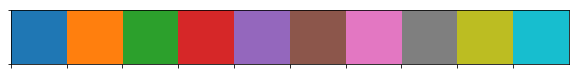

In [9]:
import seaborn as sns
palette = sns.color_palette()
%matplotlib inline
sns.palplot(palette);

In [10]:
analysis.set_population(
    name='junju', 
    label='Kilifi-Junju', 
    query='country == "Kenya" and region == "Kilifi-Junju"',
    color=palette[1],
)

Setting population 'junju'; found 13 samples.


In [11]:
analysis.set_population(
    name='mbogolo', 
    label='Kilifi-Mbogolo', 
    query='country == "Kenya" and region == "Kilifi-Mbogolo"',
    color=palette[2],
)

Setting population 'mbogolo'; found 31 samples.


In [12]:
analysis

<PopulationAnalysis at '../data/analysis'>

In [13]:
analysis.config

<YAMLConfigFile at '../data/analysis/config.yml'>
callsets:
  main:
    description: null
    format: zarr
    genotype_dataset: genotype
    label: Ag1000G Phase 1 AR3 PASS SNPs
    max_allele: 3
    path: ../../ngs.sanger.ac.uk/production/ag1000g/phase1/AR3.1/variation/main/zarr2/ag1000g.phase1.ar3.pass
    phased: false
    samples_path: samples
genome:
  accessibility:
    dataset: is_accessible
    description: null
    format: hdf5
    label: Ag1000G Phase 1 AR3 accessibility map
    path: ../../ngs.sanger.ac.uk/production/ag1000g/phase1/AR3/accessibility/accessibility.h5
  annotation:
    description: null
    format: gff3
    label: AgamP4.2
    path: ../../ngs.sanger.ac.uk/production/ag1000g/phase1/AR3/geneset/Anopheles-gambiae-PEST_BASEFEATURES_AgamP4.2.gff3.gz
  assembly:
    description: null
    format: fasta
    label: AgamP3
    path: ../../ngs.sanger.ac.uk/production/ag1000g/phase1/AR3/genome/Anopheles-gambiae-PEST_CHROMOSOMES_AgamP3.fa
populations:
  junju:
    color: 

## Tests

In [14]:
analysis.load_genome_assembly('2L')

array([b'a', b'a', b'c', ..., b'a', b'a', b'a'], 
      dtype='|S1')

In [15]:
analysis.load_genome_annotation().head()

,seqid,source,type,start,end,score,strand,phase,ID,Parent
0,2L,VectorBase,contig,1,49364325,-1,.,-1,2L,b'.'
1,2L,VectorBase,gene,157348,186936,-1,-,-1,AGAP004677,b'.'
2,2L,VectorBase,mRNA,157348,186936,-1,-,-1,AGAP004677-RB,AGAP004677
3,2L,VectorBase,exon,186860,186936,-1,-,-1,AGAP004677-RB-E1B,AGAP004677-RB
4,2L,VectorBase,exon,159192,159366,-1,-,-1,AGAP004677-RB-E2B,AGAP004677-RB


In [16]:
analysis.load_genome_accessibility('2L')

array([False, False, False, ..., False, False, False], dtype=bool)

In [17]:
analysis.load_sample_table().head()

,index,src_code,sra_sample_accession,population,country,region,contributor,contact,year,m_s,sex,n_sequences,mean_coverage,latitude,longitude
ox_code,,,,,,,,,,,,,,,
AB0085-C,0,BF2-4,ERS223996,BFS,Burkina Faso,Pala,Austin Burt,Sam O'Loughlin,2012,S,F,89905852,28.01,11.150,-4.235
AB0087-C,1,BF3-3,ERS224013,BFM,Burkina Faso,Bana,Austin Burt,Sam O'Loughlin,2012,M,F,116706234,36.76,11.233,-4.472
AB0088-C,2,BF3-5,ERS223991,BFM,Burkina Faso,Bana,Austin Burt,Sam O'Loughlin,2012,M,F,112090460,23.30,11.233,-4.472
AB0089-C,3,BF3-8,ERS224031,BFM,Burkina Faso,Bana,Austin Burt,Sam O'Loughlin,2012,M,F,145350454,41.36,11.233,-4.472
AB0090-C,4,BF3-10,ERS223936,BFM,Burkina Faso,Bana,Austin Burt,Sam O'Loughlin,2012,M,F,105012254,34.64,11.233,-4.472


In [18]:
analysis.join_sample_tables().head()

,index,src_code,sra_sample_accession,population,country,region,contributor,contact,year,m_s,sex,n_sequences,mean_coverage,latitude,longitude,kdr_1014
ox_code,,,,,,,,,,,,,,,,
AB0085-C,0,BF2-4,ERS223996,BFS,Burkina Faso,Pala,Austin Burt,Sam O'Loughlin,2012,S,F,89905852,28.01,11.150,-4.235,F/F
AB0087-C,1,BF3-3,ERS224013,BFM,Burkina Faso,Bana,Austin Burt,Sam O'Loughlin,2012,M,F,116706234,36.76,11.233,-4.472,+/F
AB0088-C,2,BF3-5,ERS223991,BFM,Burkina Faso,Bana,Austin Burt,Sam O'Loughlin,2012,M,F,112090460,23.30,11.233,-4.472,F/F
AB0089-C,3,BF3-8,ERS224031,BFM,Burkina Faso,Bana,Austin Burt,Sam O'Loughlin,2012,M,F,145350454,41.36,11.233,-4.472,F/F
AB0090-C,4,BF3-10,ERS223936,BFM,Burkina Faso,Bana,Austin Burt,Sam O'Loughlin,2012,M,F,105012254,34.64,11.233,-4.472,+/F
